In [1]:
using Plots

In [2]:
T = 2.0
k_sys = 0.1
t_sh = 0

function eᵥ(t, T_sys0 = 0.58, k_r = 0.73)
    
    T_sys = T_sys0 - (k_sys / T)
    T_r = k_r * T_sys
    
    t %= T
    if ((t_sh + T_sys) <= t < T) || (0.0 <= t < t_sh)    
        return 0.0
    elseif t_sh <= t < (t_sh + T_r)
        num = π * (t - t_sh)
        den = 2T_r
        return sin(num / den)^2
    elseif (t_sh + T_r) <=  t < (t_sh + T_sys)
        num = π * (t - t_sh - T_r)
        den = 2.0 * (T_sys - T_r)
        return cos(num / den)^2
    end
end;

Eₘₐₓ = 2.0
Eₘᵢₙ = 0.05
HR = 60
tc = 60 / HR
Tₘₐₓ = 0.2 + 0.15tc

function Eₙ(tₙ)
    n₁ = (tₙ / 0.7) ^ 1.9
    n₂ = (tₙ / 1.17) ^ 21.9
    return 1.55 * (n₁ / (1 + n₁)) * (1 / (1 + n₂))
end;

function E(t) 
    return (Eₘₐₓ - Eₘᵢₙ) * Eₙ(t/Tₘₐₓ) + Eₘᵢₙ
end;

Definindo o intervalo de tempo:

In [3]:
dt = 0.01
t = 0:dt:2T;

In [4]:
lim = map(eᵥ, t)
simaan = map(Eₙ, t .% T ./ Tₘₐₓ)

401-element Vector{Float64}:
 0.0
 0.003547488758018508
 0.013157422343883536
 0.028150526511284562
 0.04799219490592427
 0.07215340064251267
 0.10009477989126547
 0.13127137854945506
 0.16514305972896504
 0.20118580515888299
 0.23890191116758794
 0.2778281898745689
 0.3175418602367086
 ⋮
 4.3183485851862926e-15
 3.847821000004941e-15
 3.4306323914068453e-15
 3.0605039251859306e-15
 2.7319229607079485e-15
 2.4400462825532917e-15
 2.18061596284266e-15
 1.9498861527565093e-15
 1.7445593380196383e-15
 1.5617307956090782e-15
 1.3988401626180888e-15
 0.0

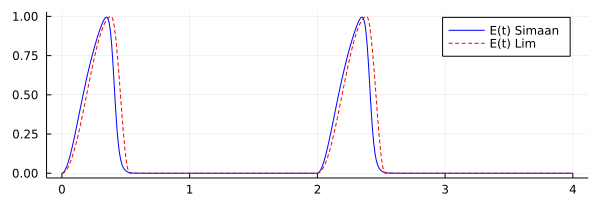

In [5]:
plot(t, simaan, label = "E(t) Simaan", color="blue")
plot!(t, lim, line = :dash, label = "E(t) Lim", size = (600, 200), color="red")

In [6]:
r(ξ) = max(ξ, 0.0)

r (generic function with 1 method)

In [7]:
x = fill(0.0, (6, length(t)))
x[:, 1] = [10.0, 0.1, 10.0, 75.0, 0.0, 150.0]
x

6×401 Matrix{Float64}:
  10.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
   0.1  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  10.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  75.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
   0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 150.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [8]:
Rₛ = 1.0000
Rₘ = 0.0050
Rₐ = 0.0010
Rc = 0.0398

Cᵣ = 4.4000
Cₛ = 1.3300
Cₐ = 0.0800

Lₛ = 0.0005

for (i, ti) in enumerate(t)
    if i > 1
        
        # x1
        
        Dₐ = (x[1, i-1] - x[4, i-1] > 0) ? 1. : 0.
        Dₘ = (x[2, i-1] - x[1, i-1] > 0) ? 1. : 0.
        
        drma = Dₘ / Rₘ + Dₐ / Rₐ
        
        x[1, i] = x[1, i-1] + dt * ((Dₐ / Rₐ * x[4, i-1]) - drma * E(ti) * x[1, i-1] + (Dₘ / Rₘ * x[2, i-1]) + drma * E(ti) * x[1, 1])
        x[6, i] = E(ti) * (x[1, i-1] - x[1, 1])
        
        # x2
        
        rscr = 1. / (Rₛ * Cᵣ)
        crrm = 1. / (Cᵣ * Rₘ)
        
        x[2, i] = x[2, i-1] + dt * (rscr * (x[3, i-1] - x[2, i-1]) - crrm * r(x[2, i-1] - x[6, i-1]))
        
        # x3
        
        x[3, i] = x[3, i-1] + dt * (rscr * (x[2, i-1] - x[3, i-1]) + 1.0 / Cₛ * x[5, i-1])
        
        # x4
        
        cara = 1. / (Cₐ * Rₐ)
        
        x[4, i] = x[2, i-1] + dt * ( -1.0 / Cₐ * x[5, i-1] + cara * r(x[6, i-1] - x[4, i-1]))
        
        # x5
        
        x[5, i] = (1. / Lₛ) * (-x[3, i-1] + x[4, i-1] - Rc * x[5, i-1])
        
    end
end

In [9]:
x

6×401 Matrix{Float64}:
  10.0      10.0         10.0        …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
   0.1       0.1225       0.0892159     NaN  NaN  NaN  NaN  NaN  NaN  NaN
  10.0       9.9775     987.399         NaN  NaN  NaN  NaN  NaN  NaN  NaN
  75.0    9375.1     -16249.9           NaN  NaN  NaN  NaN  NaN  NaN  NaN
   0.0  130000.0          8.38224e6     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 150.0       0.0          0.0        …  NaN  NaN  NaN  NaN  NaN  NaN  NaN

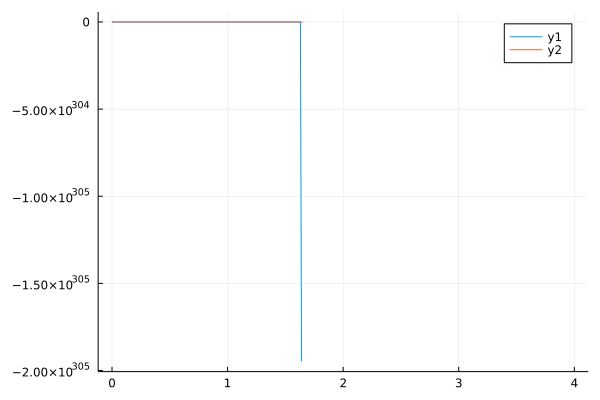

In [10]:
plot(t, [x[1,:], x[2,:]])

# Referências

[1] Lim E, Dokos S, Cloherty SL, Salamonsen RF, Mason DG, Reizes JA, Lovell NH.**Parameter-optimized model of cardiovascular–rotary blood pump interactions**. IEEE Transactions on Biomedical Engineering. 2009 Sep 18;57(2):254-66.

[2] Simaan MA, Ferreira A, Chen S, Antaki JF, Galati DG. **A dynamical state space representation and performance analysis of a feedback-controlled rotary left ventricular assist device**. IEEE Transactions on Control Systems Technology. 2008 Dec 22;17(1):15-28.